In [78]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
#from statsmodels.tsa.stattools import adfuller
#import statsmodels.api as sm
#import statsmodels.graphics.tsaplots as smt
import seaborn as sns
import matplotlib.patches as mpatches
#from statsmodels.graphics.tsaplots import plot_pacf , plot_acf
#from statsmodels.tsa.ar_model import AR
#from statsmodels.tsa.holtwinters import ExponentialSmoothing
#import pandas as pd
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import datetime
import numpy as np
import os
from sklearn.metrics import mean_squared_error
#from random import random
#from sklearn.metrics import mean_squared_error
#import scipy.stats as stats


from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Flatten
from keras.layers import LSTM
import pandas as pd
from PyAstronomy import pyasl
from sklearn.preprocessing import MinMaxScaler
#!pip install stldecompose
#import stldecompose
sns.set()

In [161]:
#file locations
path = "C:\\Users\\RJO7ABT\\Documents\\Bosch-MT\\Daten\\UCI_machine_learning_repository\\Condition_hydraulic_systems_data_set\\"
feature_list = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'EPS1', 'FS1', 'FS2', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1', 'CE', 'CP', 'SE']
feature_dict = {}
target = "profile.txt"

C:\Users\RJO7ABT\Documents\Bosch-MT\Daten\UCI_machine_learning_repository\Condition_hydraulic_systems_data_set\


In [163]:
for f in features:
    file_name = os.path.join(path, "%s.txt" %(f)) 
    with open(file_name) as file:
        print(f)
        feature_dict[f]= [[float(digit) for digit in line.split()] for line in file]     

PS1
PS2
PS3
PS4
PS5
PS6
EPS1
FS1
FS2
TS1
TS2
TS3
TS4
VS1
CE
CP
SE


In [177]:
print(features[3])
print(feature_dict[features[3]][5])

PS4
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

PS1 = 	Pressure bar 100 Hz

PS2 = 	Pressure bar 100 Hz

PS3 =   Pressure bar 100 Hz

PS4 = 	Pressure bar 100 Hz

PS5 =   Pressure bar 100 Hz

PS6 =   Pressure bar 100 Hz

EPS1 =  Motor Power W 100 Hz

FS1 = Volume flow l/min 10 Hz

FS2 = Volume flow l/min 10 Hz

TS1 = Temperature °C 1 Hz

TS2 = Temperature °C  1 HZ

TS3 = Temperature °C 1 Hz

TS4 = Temperature °C 1 Hz

VS1 = Vibration mm/s 1 Hz

CE = Cooling efficiency (virtual) % 1 Hz

CP = Cooling power (Virtual) kW 1Hz

SE = Efficiency factor % 1 Hz

In [214]:
#function to plot features
def plot_features(feature_dict, feature_list, ceiling=10):
    
    print(feature_list)
    
    for i in range(0,len(feature_dict[feature_list])):
        print("%s of %s" %(i, len(feature_dict[feature_list])))
        plt.subplots(figsize=(20,10))
        plt.plot(feature_dict[feature_list][i])
        plt.show()
        if i == ceiling-1:
            break

In [225]:
#variable overview 
#for i in range(0, len(feature_list)):
#    plot_features(feature_dict, feature_list[i], ceiling=1)

In [257]:
data2dMatrix = np.array(feature_dict[feature_list[0]])

data3Matrix = data2dMatrix[:,:,]
print(dataMatrix.shape[1])
#np.concatenate((data2dMatrix, feature_list), axis=0)


#np.ndarray(dataMatrix.shape[0], dataMatrix.shape[1], len(feature_list), axis=1)

cube =np.ndarray(shape=(dataMatrix.shape[0],dataMatrix.shape[1], len(feature_list)), dtype=float,)
print(cube.shape)
print(cube[1:5].shape)
print()

6000
(2205, 6000, 17)
(4, 6000, 17)



In [31]:
#if True:
  #  df_19["IPB.TEMP.BAG"] = df_19["IPB.TEMP.BAG"].apply(lambda x:float(x.replace(",",".")))
  #  df_19["TEMPERATURE"] = df_19["TEMPERATURE"].apply(lambda x:float(x.replace(",",".")))
  #  df_19["IPB.TEMP.BULKHEAD"] = df_19["IPB.TEMP.BULKHEAD"].apply(lambda x:float(x.replace(",",".")))
    
    #df_20["IPB.TEMP.BAG"] = df_20["IPB.TEMP.BAG"].apply(lambda x:float(x.replace(",",".")))
   # df_20["TEMPERATURE"] = df_20["TEMPERATURE"].apply(lambda x:float(x.replace(",",".")))
   # df_20["IPB.TEMP.BULKHEAD"] = df_20["IPB.TEMP.BULKHEAD"].apply(lambda x:float(x.replace(",",".")))
    
    
df_20.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26016 entries, 0 to 26015
Data columns (total 27 columns):
Unnamed: 0                          26016 non-null int64
ACT TEST CYCLES                     26016 non-null int64
DASIM VERSION                       666 non-null object
DATA STORAGE FOLDER                 26016 non-null object
DATE                                26016 non-null object
IPB.TEMP.BAG                        26016 non-null float64
IPB.TEMP.BULKHEAD                   26016 non-null float64
MODULE                              26016 non-null object
MODULE ACTUAL CYCLES                26016 non-null int64
MOTOR.ACTIVATIONS                   26016 non-null int64
MOTOR.CURRENT FEED TIME             26016 non-null object
MOTOR.HS FACTOR                     26016 non-null object
MOTOR.RUNTIME                       26016 non-null object
MOTOR.RUNTIME DIGITAL               26016 non-null object
PROGRAM VERSION                     666 non-null float64
PROJECT                   

In [32]:
df_19_A = df_19[df_19["MODULE"] == "vpmt_A.syn"]
df_19_B = df_19[df_19["MODULE"] == "vpmt_B.syn"]
df_19_C = df_19[df_19["MODULE"] == "vpmt_C.syn"]

df_20_A = df_20[df_20["MODULE"] == "vpmt_A.syn"]
df_20_B = df_20[df_20["MODULE"] == "vpmt_B.syn"]
df_20_C = df_20[df_20["MODULE"] == "vpmt_C.syn"]

In [40]:
lks_x= [22, 24 , 25, 26, 27, 28, 29, 30, 36, 37, 38, 39, 60]

for x in lks_x:
    print(x)

22
24
25
26
27
28
29
30
36
37
38
39
60


In [33]:
def scatter_plot(df, xaxis, yaxis, temperature=None):
    
    if temperature != None: 
        fig, ax = plt.subplots(figsize=(20,10))
        scatter = ax.scatter(df[xaxis], y=df[yaxis] , c=df[temperature].tolist(), s=100, marker='.', cmap=plt.cm.coolwarm)
        clb = fig.colorbar(scatter)
        clb.ax.set_title('Temperature')
        plt.xlabel("%s" %(xaxis))
        plt.ylabel("%s" %(yaxis))
        plt.title("%s and %s" %(xaxis, yaxis))
        plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(20,10))
        scatter = ax.scatter(df[xaxis].tolist(), y=df[yaxis])
        plt.xlabel("%s" %(xaxis))
        plt.ylabel("%s" %(yaxis))
        plt.title("%s and %s" %(xaxis, yaxis))
        plt.show()

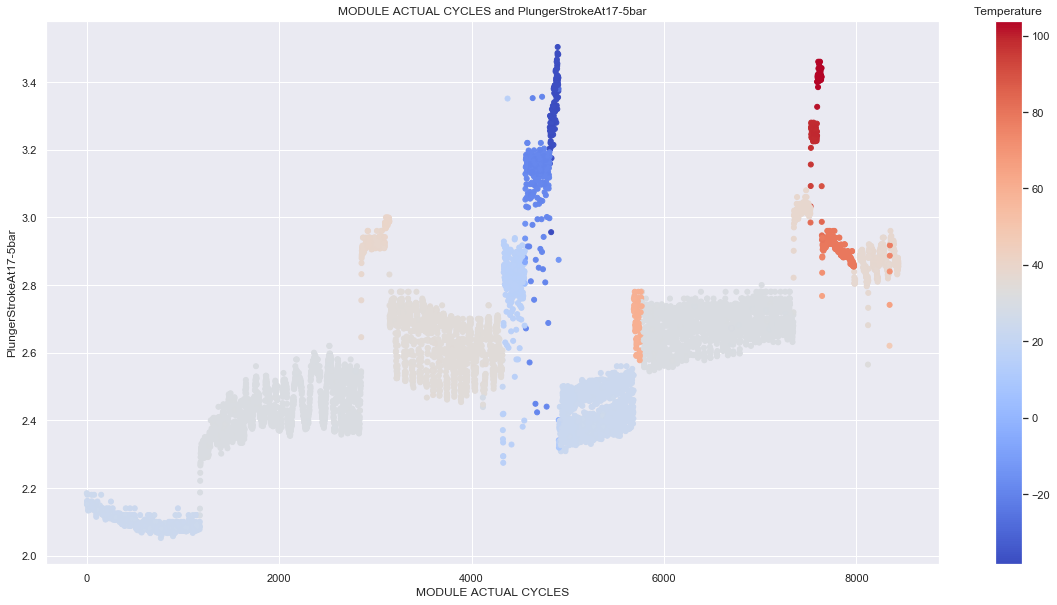

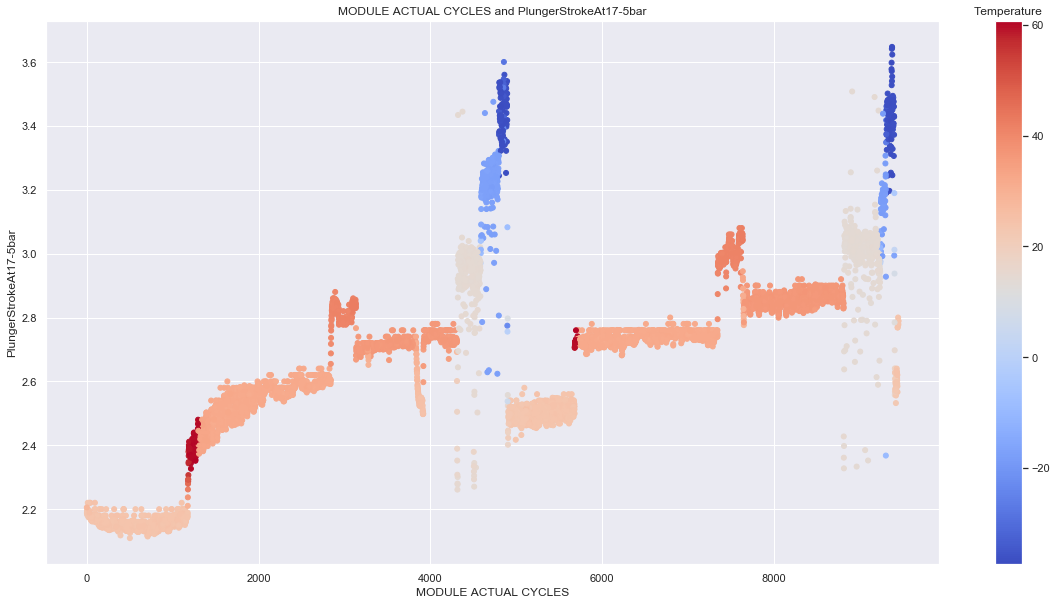

In [35]:
scatter_plot(df_19_A, xaxis="MODULE ACTUAL CYCLES", yaxis="PlungerStrokeAt17-5bar", temperature='IPB.TEMP.BAG')
scatter_plot(df_20_A, xaxis="MODULE ACTUAL CYCLES", yaxis="PlungerStrokeAt17-5bar", temperature='IPB.TEMP.BAG')
#scatter_plot(df_19_C, xaxis="MODULE ACTUAL CYCLES", yaxis="PlungerStrokeAt17-5bar", temperature='IPB.TEMP.BAG')
#scatter_plot(df_19_new, xaxis="MODULE ACTUAL CYCLES", yaxis="PlungerPressureMax", temperature='IPB.TEMP.BAG')
#scatter_plot(df_19_new, xaxis="MODULE ACTUAL CYCLES", yaxis="PistonStrokeAtPlungerPressureMax", temperature='IPB.TEMP.BAG')


In [81]:
#data preperation and exploration
df = pd.read_csv(src_path)

#create ID and change Index to DATE
if True:
    df["ID"] = df.index + 1
    
#set convert to True to convert datetime object column to string
if True:
    df['DATE'] = df['DATE'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    

#print("Five Point Summary")
#print(df.iloc[:,0:-1].describe())




df.index=pd.to_datetime(df['DATE'])

#convert univariate dataframe to list
demag_list = df['DEMAGNET_MAX_SPEED_FILT'].tolist()

if type(df) == list:
    print(type(demag_list))
    
#type(demag_list)

In [86]:
def scatter_plot(df):
    fig, ax = plt.subplots(figsize=(20,10))
    scatter = ax.scatter(df['ID'].tolist(), y=df['DEMAGNET_MAX_SPEED_FILT'] , c=df['IPB.TEMP.BAG'], s=100, marker='.', cmap=plt.cm.coolwarm)
    clb = fig.colorbar(scatter)
    clb.ax.set_title('Temperature')
    plt.xlabel("Braking")
    plt.ylabel("DEMAGNET_MAX_SPEED_FILT")
    plt.title("DEMAGNET_MAX_SPEED_FILT drift over Time")
    plt.show()



def baseline_box_plot(df):
    plt.subplots(figsize=(20,10))
    plt.boxplot(df, sym='r.')
    plt.violinplot(df)
    plt.xlabel("DEMAGNET_MAX_SPEED_FILT")
    plt.ylabel("Value")
    plt.title("Boxplot and Violinplot for DEMAGNET_MAX_SPEED_FILT")
    plt.show()
    
def baseline_distribution(df):
    mean = mpatches.Patch(color='black', label='Mean')
    std1 = mpatches.Patch(color='blue', label='+/- 3 Standard Deviations 99,7%')
    std4 = mpatches.Patch(color='yellow', label='+/- 4 Standard Deviations 99,9%')
    red = mpatches.Patch(color='red', label='anomaly')

    epsilon = np.mean(df['DEMAGNET_MAX_SPEED_FILT']) + 4 * np.std(df['DEMAGNET_MAX_SPEED_FILT'])

    red_ticks = df[df['DEMAGNET_MAX_SPEED_FILT'] > epsilon]
    green_ticks = df[df['DEMAGNET_MAX_SPEED_FILT'] <= epsilon]

    #plot distribution of value"
    _, ax = plt.subplots(figsize=(20,10))
    ax = sns.distplot(df['DEMAGNET_MAX_SPEED_FILT'], hist=True)
    sns.rugplot(green_ticks['DEMAGNET_MAX_SPEED_FILT'], color="green")
    sns.rugplot(red_ticks['DEMAGNET_MAX_SPEED_FILT'], color="red")
    ax.set(xlabel='DEMAGNET_MAX_SPEED_FILT', ylabel='Density', title="Baseline Density of DEMAGNET_MAX_SPEED_FILT")
    ax.axvline(np.mean(df['DEMAGNET_MAX_SPEED_FILT']), color="black")
    ax.axvline((np.mean(df['DEMAGNET_MAX_SPEED_FILT']) + 3 * np.std(df['DEMAGNET_MAX_SPEED_FILT'])), color="blue")
    ax.axvline((np.mean(df['DEMAGNET_MAX_SPEED_FILT']) - 3 * np.std(df['DEMAGNET_MAX_SPEED_FILT'])), color="blue")
    ax.axvline((np.mean(df['DEMAGNET_MAX_SPEED_FILT']) + 4 * np.std(df['DEMAGNET_MAX_SPEED_FILT'])), color="yellow")
    ax.axvline((np.mean(df['DEMAGNET_MAX_SPEED_FILT']) - 4 * np.std(df['DEMAGNET_MAX_SPEED_FILT'])), color="yellow")
    ax.legend(handles=[mean, std1, std4, red])  

#### Baseline for unsupervised Approach

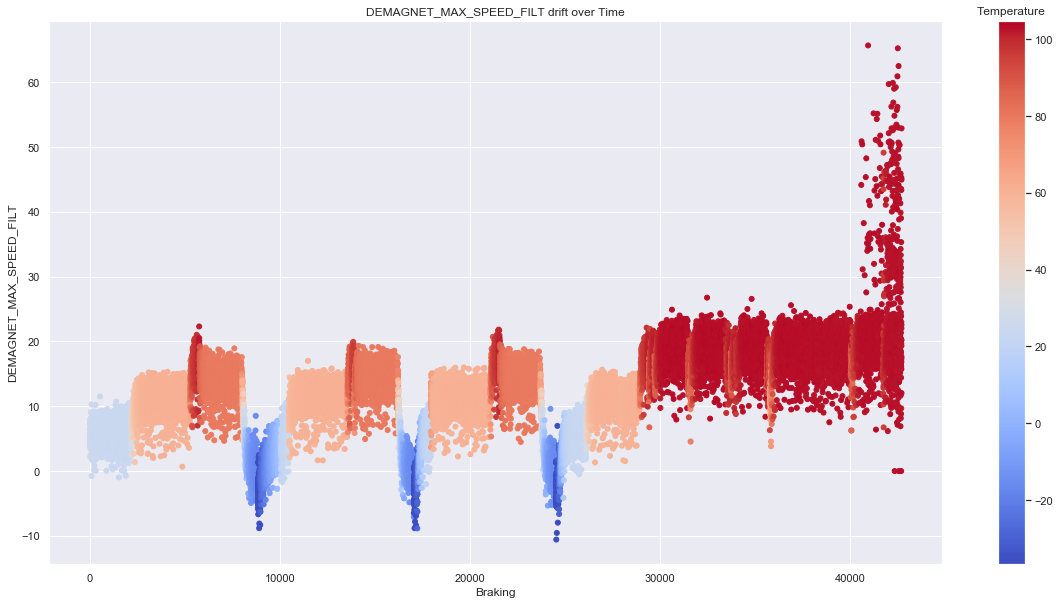

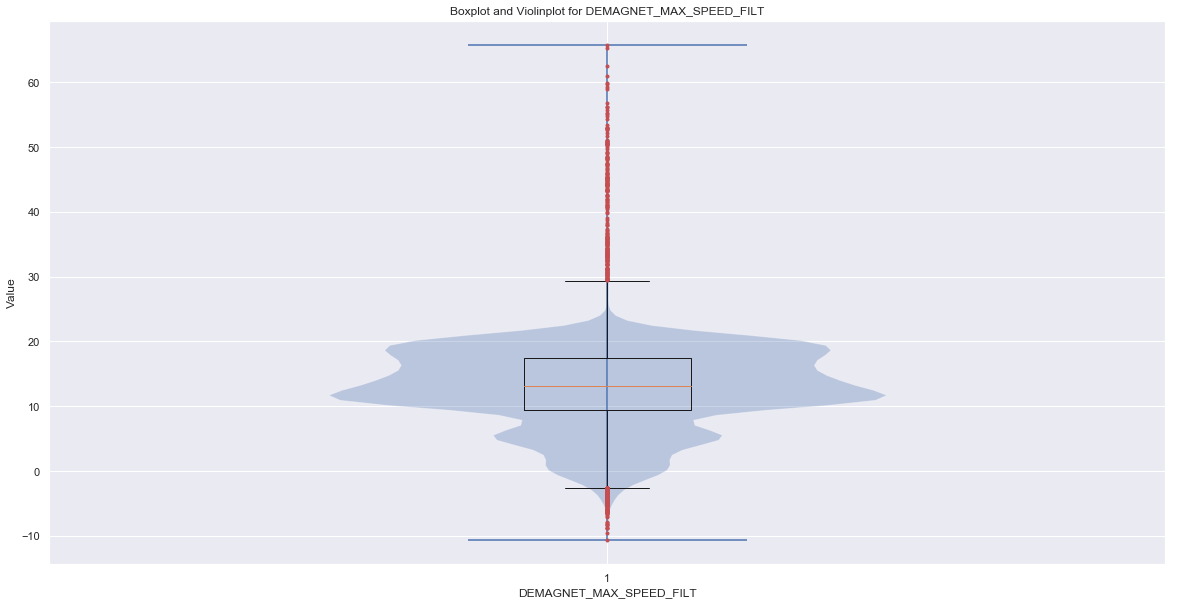

c:\users\rjo7abt\.conda\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


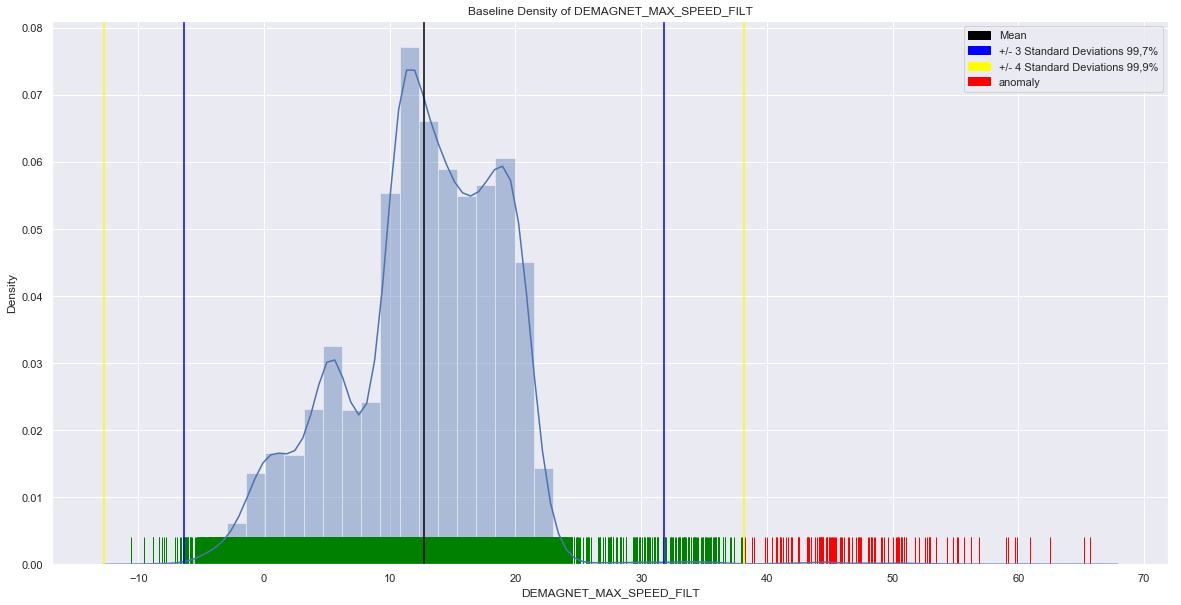

In [87]:
scatter_plot(df)
baseline_box_plot(df['DEMAGNET_MAX_SPEED_FILT'])
baseline_distribution(df)

In [15]:
df_multivariate = df[['IPB.TEMP.BAG', 'DEMAGNET_MAX_SPEED_FILT']]
len(df_multivariate.iloc[0:30000])

30000

In [16]:
#split data in train and test split
def train_test_split(df, n_train):
    
        #data = data[column].tolist() 
        
        if len(df) < n_train:
            raise Exception('end out of range: %d %d' % (end, len(data)))
        else:
            return df.iloc[0:n_train], df.iloc[n_train:]

In [17]:
n_train = 22000
df_train , df_test = train_test_split(df_multivariate, n_train)

In [18]:
print(df_train.shape)
print(df_train.tail(3))

(22000, 2)
                     IPB.TEMP.BAG  DEMAGNET_MAX_SPEED_FILT
DATE                                                      
2018-04-21 13:16:30     80.316162                11.920809
2018-04-21 13:17:13     80.096436                16.643648
2018-04-21 13:17:18     80.255127                17.060044


In [19]:
print(df_test.shape)
print(df_test.head(3))

(20708, 2)
                     IPB.TEMP.BAG  DEMAGNET_MAX_SPEED_FILT
DATE                                                      
2018-04-21 13:17:49     80.291748                14.289771
2018-04-21 13:17:53     79.394531                14.242588
2018-04-21 13:18:20     79.931641                12.382219


In [30]:
def df_to_list(data):
    
    arr_out_seq_demag = np.array(data['DEMAGNET_MAX_SPEED_FILT'])


    in_seq_temp = np.array(data['IPB.TEMP.BAG'])
    in_seq_demag = np.array(data['DEMAGNET_MAX_SPEED_FILT'])
    out_seq_demag = arr_out_seq_demag[1:]
    out_seq_demag = np.concatenate([out_seq_demag,[0]])

    # convert to [rows, columns] structure
    in_seq_tmp_reshape = in_seq_temp.reshape((len(in_seq_temp), 1))
    in_seq_demag_reshape = in_seq_demag.reshape((len(in_seq_demag), 1))
    out_seq_demag_reshape = out_seq_demag.reshape((len(out_seq_demag), 1))

    #out_seq_demag_train_reshape
    #in_seq_demag_train_reshape
    #len(in_seq_tmp_train_reshape)
    #print(in_seq_tmp_reshape.shape)
    #print(in_seq_demag_reshape.shape)
    #print(in_seq_tmp_reshape.shape)


    data_list = np.hstack((in_seq_tmp_reshape, in_seq_demag_reshape, out_seq_demag_reshape))

    return data_list

#### Baseline Model Train and Test data

In [23]:
#baseline_train_list = df_train['DEMAGNET_MAX_SPEED_FILT'].tolist()
#baseline_test_list = df_test['DEMAGNET_MAX_SPEED_FILT'].tolist()

#baseline_train_list = np.reshape(baseline_train_list, (-1,1))
#baseline_test_list = np.reshape(baseline_test_list, (-1,1))
#baseline_test_list.shape

(20708, 1)

In [29]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = scaler.fit(train_list)

#baseline_train_list_scaled = scaler.fit_transform(baseline_train_list)
#print(baseline_train_list_scaled)
#baseline_test_list_scaled = scaler.fit_transform(baseline_test_list)#
#print(baseline_test_list_scaled)
#print(baseline_test_list)

In [95]:
#baseline_train_list_scaled = baseline_train_list_scaled.flatten()
#baseline_test_list_scaled = baseline_test_list_scaled.flatten()

In [33]:
train_list =  df_to_list(df_train)
test_list = df_to_list(df_test)
#print(train_list)
print(test_list.shape)
print(train_list.shape)

(20708, 3)
(22000, 3)


In [34]:
#train_list = np.hstack((in_seq_tmp_train_reshape, in_seq_demag_train_reshape, out_seq_demag_train_reshape))
#print(dataset)
train_list = train_list[:-1,:]
print(train_list)
test_list = test_list[:-1,:]
print(test_list.shape)

[[26.977539    3.68306403  4.69999764]
 [26.977539    4.69999764  4.75099686]
 [26.9104      4.75099686  4.15842928]
 ...
 [80.303955   14.58696112 11.92080893]
 [80.316162   11.92080893 16.64364791]
 [80.096436   16.64364791 17.06004422]]
(20707, 3)


### Normalize Data

In [35]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(train_list)
train_list_scaled = scaler.fit_transform(train_list)
print(train_list_scaled)
test_list_scaled = scaler.fit_transform(test_list)
#print(test_list_scaled)

[[0.4586116  0.40210293 0.43474434]
 [0.4586116  0.43474434 0.43638131]
 [0.45812829 0.43638131 0.41736115]
 ...
 [0.84248682 0.75209492 0.66651708]
 [0.84257469 0.66651708 0.8181102 ]
 [0.84099297 0.8181102  0.83147564]]


In [36]:
# split a multivariate sequence one step into samples
def data_preparation_one_step(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [38]:
n_steps=5

In [43]:
#non-scaled train set
X_train , y_train = data_preparation_one_step(train_list, n_steps)
print("length: " + str(len(X_train)))
print(X_train.shape, y_train.shape)

for i in range(3):
    print(X_train[i], y_train[i])
    

length: 21995
(21995, 5, 2) (21995,)
[[26.977539    3.68306403]
 [26.977539    4.69999764]
 [26.9104      4.75099686]
 [26.885986    4.15842928]
 [27.050781    5.4372482 ]] 6.3445201520099985
[[26.977539    4.69999764]
 [26.9104      4.75099686]
 [26.885986    4.15842928]
 [27.050781    5.4372482 ]
 [26.922607    6.34452015]] 7.25890441298
[[26.9104      4.75099686]
 [26.885986    4.15842928]
 [27.050781    5.4372482 ]
 [26.922607    6.34452015]
 [26.885986    7.25890441]] 6.34809915245


In [40]:
#non-scaled test set
X_test , y_test = data_preparation_one_step(test_list, n_steps)
print("length: " + str(len(X_test)))
print(X_test.shape, y_test.shape)

for i in range(3):
    print(X_test[i], y_test[i])

length: 20703
(20703, 5, 2) (20703,)
[[80.291748   14.2897712 ]
 [79.394531   14.24258808]
 [79.931641   12.38221877]
 [80.26123    15.10772328]
 [80.047607   12.31705121]] 15.614519355999999
[[79.394531   14.24258808]
 [79.931641   12.38221877]
 [80.26123    15.10772328]
 [80.047607   12.31705121]
 [80.267334   15.61451936]] 15.3770422246
[[79.931641   12.38221877]
 [80.26123    15.10772328]
 [80.047607   12.31705121]
 [80.267334   15.61451936]
 [79.876709   15.37704222]] 8.68370551037


In [44]:
#scaled train set
X_train_scaled , y_train_scaled = data_preparation_one_step(train_list_scaled, n_steps)
print("length: " + str(len(X_train_scaled)))
print(X_train_scaled.shape, y_train_scaled.shape)

for i in range(3):
    print(X_train_scaled[i], y_train_scaled[i])
    

length: 21995
(21995, 5, 2) (21995,)
[[0.4586116  0.40210293]
 [0.4586116  0.43474434]
 [0.45812829 0.43638131]
 [0.45795254 0.41736115]
 [0.45913884 0.45840852]] 0.4875300303781368
[[0.4586116  0.43474434]
 [0.45812829 0.43638131]
 [0.45795254 0.41736115]
 [0.45913884 0.45840852]
 [0.45821616 0.48753003]] 0.5168798272916045
[[0.45812829 0.43638131]
 [0.45795254 0.41736115]
 [0.45913884 0.45840852]
 [0.45821616 0.48753003]
 [0.45795254 0.51687983]] 0.4876449087072495


In [45]:
#scaled test set
X_test_scaled , y_test_scaled = data_preparation_one_step(test_list_scaled, n_steps)
print("length: " + str(len(X_test_scaled)))
print(X_test_scaled.shape, y_test_scaled.shape)

for i in range(3):
    print(X_test_scaled[i], y_test_scaled[i])

length: 20703
(20703, 5, 2) (20703,)
[[0.82648441 0.32605399]
 [0.82014574 0.3254351 ]
 [0.82394032 0.30103335]
 [0.82626881 0.33678275]
 [0.8247596  0.30017858]] 0.34343019828610705
[[0.82014574 0.3254351 ]
 [0.82394032 0.30103335]
 [0.82626881 0.33678275]
 [0.8247596  0.30017858]
 [0.82631193 0.3434302 ]] 0.3403153019705595
[[0.82394032 0.30103335]
 [0.82626881 0.33678275]
 [0.8247596  0.30017858]
 [0.82631193 0.3434302 ]
 [0.82355224 0.3403153 ]] 0.2525213752586999


In [138]:
#baseline_test_list_scaled.flatten()

In [42]:
#convert univariate dataframe to list
#demag_train_list = df_train['DEMAGNET_MAX_SPEED_FILT'].tolist()
#demag_test_list = df_test['DEMAGNET_MAX_SPEED_FILT'].tolist()
#print(demag_test_list)

In [46]:
#naive and average baseline
def baseline(data, setting):
    window, types = setting
    value_list = list()
    
    if types == 'naive':
        #naive/persistence baseline
        #print('naive')
        return data[-1]
        
    
    else:
        if window == 1:
            value_list = data[-window]
            print(value_list)
    
        else:
            #print("average baseline")
            for i in range(1, window+1):
                #if i > 0:
                    #print(data[-i])
                    value_list.append(data[-i])
    
        return np.mean(value_list)

In [317]:
#baseline(demag_test_list, (1,'naive'))
#baseline_test_list_scaled
#baseline_test_list_scaled
#print(baseline_test_list)

#print(demag_test_list[5-2:5])

#baseline(demag_test_list[5-2:5], (2,'average'))

array([[0.30203574],
       [0.21387201],
       [0.28902643],
       ...,
       [0.18324259],
       [0.68459736],
       [0.80512787]])

In [318]:
#make naive and average baseline forecast
def baseline_forecast(data, window=2):
    naive_forecast_list = []
    average_forecast_list = []

    for i in range(0, len(data)):
        #print("----- value %d ------ " % i)
        #if i > 0:
            #print("naive forecast: " + str(baseline(data[0:i], (1,'naive'))))
        #print(data[i:i])
        naive_forecast_list.append(baseline(data[i:i+2], (1,'naive')))
        #else:
            #print('naive forecast: NAN' )
         #   naive_forecast_list.append(np.nan)
            #pass
    
        if i >= window:
            #print("average forecast: " + str(baseline(data[0:i], (window,'average'))))
            average_forecast_list.append(baseline(data[i-window:i], (window,'average')))
        else:
            #print('average forecast: NAN' )
            average_forecast_list.append(np.nan)
            #pass
    
        #print("actual: " + str(data[i]))

    return naive_forecast_list, average_forecast_list

In [319]:
#make naive and average baseline forecast
window_size=100
naive_forecast_list, average_forecast_list = baseline_forecast(baseline_test_list_scaled.flatten(), window_size)


print(naive_forecast_list[0:10])
print(average_forecast_list[0:10])
print(demag_test_list[0:10])

#print(demag_list[0:n_train])

print(len(naive_forecast_list))
print(len(average_forecast_list))
print(len(demag_test_list))

[0.2138720058471252, 0.2890264335970695, 0.28383132771739694, 0.28724460912215016, 0.32319179356494976, 0.2825112125378735, 0.27897096909368396, 0.17064386446013882, 0.277552380485676, 0.24216056431028618]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[14.2897711968, 14.242588077799999, 12.3822187746, 15.1077232801, 12.3170512132, 15.614519355999999, 15.3770422246, 8.68370551037, 12.7287311103, 13.6560183046]
12707
12707
20708


In [47]:
#evaluation metrics
def mse(actual, predicted):
    return  mean_squared_error(actual, predicted)

def rmse(mse):
    return np.sqrt(mse)

In [48]:
#df_baseline_forecast = pd.DataFrame(
#    {'1_demag': baseline_test_list_scaled.flatten(),
#     '2_naive_forecast': naive_forecast_list,
#     '3_average_forecast': average_forecast_list
#    })#

#df_baseline_forecast.head(120)

In [49]:
'''
df_baseline_forecast = pd.DataFrame(
    {'1_demag': baseline_test_list_scaled.flatten(),
     '2_naive_forecast': naive_forecast_list,
     '3_average_forecast': average_forecast_list
    })#

df_baseline_forecast_dropna=  df_baseline_forecast.dropna()

print(df_baseline_forecast_dropna)

naive_mse = mse(df_baseline_forecast_dropna['1_demag'],df_baseline_forecast_dropna['2_naive_forecast'])
average_2_mse = mse(df_baseline_forecast_dropna['1_demag'],df_baseline_forecast_dropna['3_average_forecast'])

naive_rmse = rmse(naive_mse)
average_2_rmse = rmse(average_2_mse)



print("Naive baseline forecast MSE: " + str(naive_mse))
print("Average  baseline forecast (Window=2)  MSE: " + str(average_2_mse))

print("Average baseline forecast RMSE: " + str(naive_rmse))
print("Average  baseline forecast (Window=2)  RMSE: " + str(average_2_rmse))
'''

'\ndf_baseline_forecast = pd.DataFrame(\n    {\'1_demag\': baseline_test_list_scaled.flatten(),\n     \'2_naive_forecast\': naive_forecast_list,\n     \'3_average_forecast\': average_forecast_list\n    })#\n\ndf_baseline_forecast_dropna=  df_baseline_forecast.dropna()\n\nprint(df_baseline_forecast_dropna)\n\nnaive_mse = mse(df_baseline_forecast_dropna[\'1_demag\'],df_baseline_forecast_dropna[\'2_naive_forecast\'])\naverage_2_mse = mse(df_baseline_forecast_dropna[\'1_demag\'],df_baseline_forecast_dropna[\'3_average_forecast\'])\n\nnaive_rmse = rmse(naive_mse)\naverage_2_rmse = rmse(average_2_mse)\n\n\n\nprint("Naive baseline forecast MSE: " + str(naive_mse))\nprint("Average  baseline forecast (Window=2)  MSE: " + str(average_2_mse))\n\nprint("Average baseline forecast RMSE: " + str(naive_rmse))\nprint("Average  baseline forecast (Window=2)  RMSE: " + str(average_2_rmse))\n'

In [50]:
# grid search for best baseline
def grid_search_baseline(baseline_test,  window_size):
    
    df_rmse_baseline = pd.DataFrame(columns=['baseline' ,'MSE', 'RMSE'])
    
    for window in range(1, window_size+1):
        #print(window)
        if window == 1:
            _, average_forecast_list = baseline_forecast(baseline_test, window)
            df_baseline_forecast = pd.DataFrame({'demag': baseline_test,
                                                 'naive_forecast': average_forecast_list,
                                                 })
            
            df_mse = df_baseline_forecast[['demag', 'naive_forecast']].dropna()
            
            mse_ = mse(df_mse['demag'],df_mse['naive_forecast'])
            rmse_ = rmse(mse_)
            print("naive_forecast MSE: " + str(mse_))
            df_rmse_baseline = df_rmse_baseline.append(pd.DataFrame([['naive_forecast', mse_, rmse_]], 
                                                                    columns=['baseline' ,'MSE', 'RMSE']),
                                                       ignore_index=True)
    
        else:
            _ , average_forecast_list = baseline_forecast(baseline_test, window)
            df_baseline_forecast['w%d_average_forecast' % window] = pd.Series(average_forecast_list)
            df_mse = df_baseline_forecast[['demag', 'w%d_average_forecast' % window]].dropna()
            print('w%d_average_forecast MSE: '  % window + str(mse(df_mse['demag'],df_mse['w%d_average_forecast' % window])))
            
            mse_ = mse(df_mse['demag'],df_mse['w%d_average_forecast' % window])
            rmse_ = rmse(mse_)
            df_rmse_baseline = df_rmse_baseline.append(pd.DataFrame([['w%d_average_forecast' % window, mse_, rmse_]], 
                                                                    columns=['baseline' ,'MSE', 'RMSE']),
                                                       ignore_index=True)
    
    return df_rmse_baseline

In [51]:

#demag_test_list
#df_mse_baseline = grid_search_baseline(baseline_test_list_scaled.flatten(), 100)
#df_mse_baseline = grid_search_baseline(demag_test_list, 100)

In [325]:
print("best naive forecast model: ")
df_mse_baseline[df_mse_baseline['MSE'] == np.min(df_mse_baseline['MSE'])]

best naive forecast model: 


,baseline,MSE,RMSE
58,w59_average_forecast,0.003263,0.057124


In [53]:
#_, ax = plt.subplots(figsize=(20,10))
#ax.scatter([x for x in range(1, len(df_mse_baseline)+1)],df_mse_baseline['MSE'])
#ax.set_xlabel("Window Size")
#ax.set_ylabel("MSE")
#ax.set_title("Test MSE and Window Size for Baseline")
#plt.show()

In [54]:
# split into input and outputs 1 step
list_train_X, list_train_y = train_list[:, :-1], train_list[:, -1]
list_test_X, list_test_y = test_list[:, :-1], test_list[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = list_train_X.reshape((list_train_X.shape[0], 1, list_train_X.shape[1]))
train_y = list_train_y.reshape((list_train_y.shape[0], 1))

test_X = list_test_X.reshape((list_test_X.shape[0], 1, list_test_X.shape[1]))
test_y = list_test_y.reshape((list_test_y.shape[0], 1))
#print("list shape train")
#print(list_train_X.shape, list_train_y.shape)

#print("tensor shape:")
#print(train_X.shape, train_y.shape)

#print(test_y[1][0])


In [55]:
# split into input and outputs 1 step
X_train.shape

(21995, 5, 2)

In [137]:
#plotting results

def prediction_plot(predictions, start, end):
    red_patch = mpatches.Patch(color='red', label='Prediction')
    green_patch = mpatches.Patch(color='green', label='Actual')


    plt.subplots(figsize=(20,10))
    plt.plot(y_test, color="green")
    plt.plot(predictions, color="red")
    plt.xlim((start,end ))
    plt.xlabel("Braking")
    plt.ylabel("DEMAGNET_MAX_SPEED_FILT")
    plt.title("Actual and Predictions of Test Data")
    plt.legend(handles=[red_patch, green_patch])
    plt.show()


def residual_plot(residuals):
    plt.subplots(figsize=(20,10))
    plt.plot(residuals)
    plt.title("Residuals of Test Data")
    plt.xlabel("Braking")
    plt.ylabel("DEMAGNET_MAX_SPEED_FILT")
    plt.show()


def residual_distribution_plot(residuals):
    mean = mpatches.Patch(color='black', label='Mean')
    std1 = mpatches.Patch(color='blue', label='+/- 3 Standard Deviations 99,7%')
    std4 = mpatches.Patch(color='yellow', label='+/- 4 Standard Deviations 99,9%')
    red = mpatches.Patch(color='red', label='anomaly')

    epsilon = np.mean(residuals) + 4 * np.std(residuals)

    #red_ticks = df[df['DEMAGNET_MAX_SPEED_FILT'] > epsilon]
    #green_ticks = df[df['DEMAGNET_MAX_SPEED_FILT'] <= epsilon]

    #plot distribution of value"
    _, ax = plt.subplots(figsize=(20,10))
    ax = sns.distplot(residuals, hist=True)
    sns.rugplot(residuals, color="green")
    #sns.rugplot(red_ticks['DEMAGNET_MAX_SPEED_FILT'], color="red")
    ax.set(xlabel='DEMAGNET_MAX_SPEED_FILT', ylabel='Density', title="Density of DEMAGNET_MAX_SPEED_FILT Residuals")
    ax.axvline(np.mean(residuals), color="black")
    ax.axvline((np.mean(residuals) + 3 * np.std(residuals)), color="blue")
    ax.axvline((np.mean(residuals) - 3 * np.std(residuals)), color="blue")
    ax.axvline((np.mean(residuals) + 4 * np.std(residuals)), color="yellow")
    ax.axvline((np.mean(residuals) - 4 * np.std(residuals)), color="yellow")
    ax.legend(handles=[mean, std1, std4, red])

### MLP

In [96]:
#flatten input for MLP
# flatten input
#n_input = X_train.shape[1] * X.shape[2]
#X = X.reshape((X.shape[0], n_input))
n_input = X_train.shape[1] * X_train.shape[2]
X_train_mlp = X_train.reshape((X_train.shape[0], n_input))
X_test_mlp = X_test.reshape((X_test.shape[0], n_input))
X_train_mlp.shape
#X_test_mlp

(21995, 10)

In [124]:
#mlp
model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=n_input))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(100, activation='relu'))
model_mlp.add(Dense(1, activation='linear'))
model_mlp.compile(optimizer='rmsprop', loss='mse')

In [125]:
model_mlp.fit(X_train_mlp, y_train.flatten(), epochs=50, verbose=1, validation_data=(X_test_mlp ,y_test.flatten()))

Train on 21995 samples, validate on 20703 samples
Epoch 1/50
21995/21995 [==============================] - 2s 113us/step - loss: 7.1438 - val_loss: 10.3987
Epoch 2/50
21995/21995 [==============================] - 2s 88us/step - loss: 4.7316 - val_loss: 16.7467
Epoch 3/50
21995/21995 [==============================] - 2s 99us/step - loss: 4.3067 - val_loss: 10.6004
Epoch 4/50
21995/21995 [==============================] - 2s 89us/step - loss: 4.1041 - val_loss: 19.0782
Epoch 5/50
21995/21995 [==============================] - 2s 89us/step - loss: 3.9422 - val_loss: 23.2009
Epoch 6/50
21995/21995 [==============================] - 2s 88us/step - loss: 3.8901 - val_loss: 16.6780
Epoch 7/50
21995/21995 [==============================] - 2s 104us/step - loss: 3.8213 - val_loss: 11.2100
Epoch 8/50
21995/21995 [==============================] - 2s 88us/step - loss: 3.7390 - val_loss: 14.2026
Epoch 9/50
21995/21995 [==============================] - 2s 81us/step - loss: 3.6944 - val_loss: 11

In [131]:
#prediction
predictions_mlp = model_mlp.predict(X_test_mlp, verbose=1)

20703/20703 [==============================] - 1s 31us/step


In [132]:
residuals_mlp = y_test - predictions_mlp.flatten()
mean_squared_error(predictions_mlp, y_test)

17.92925810460734

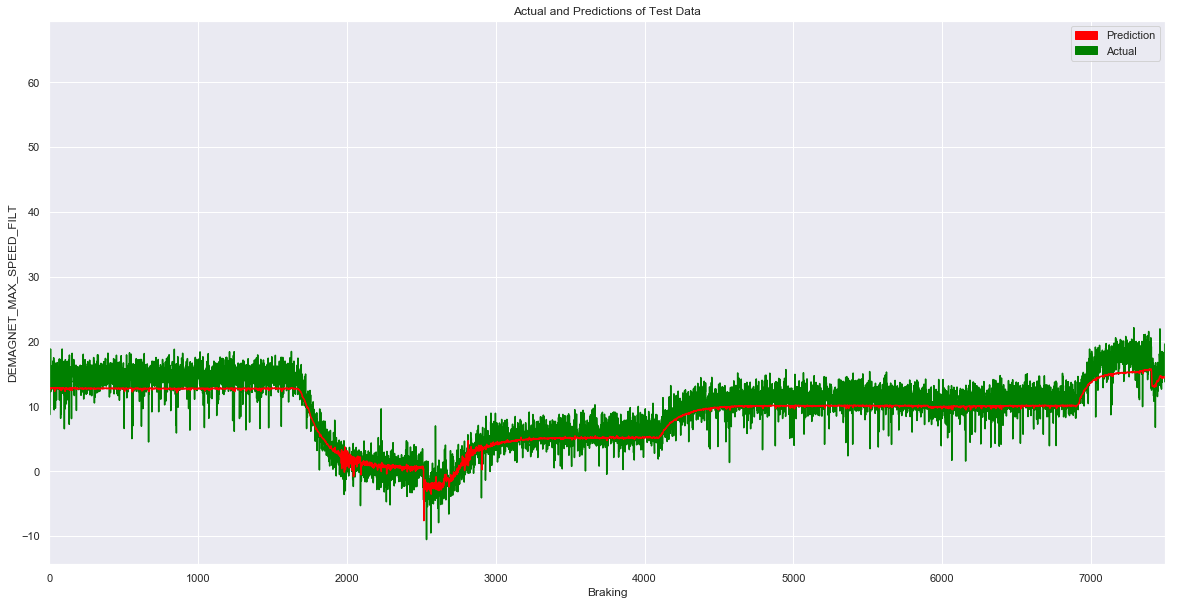

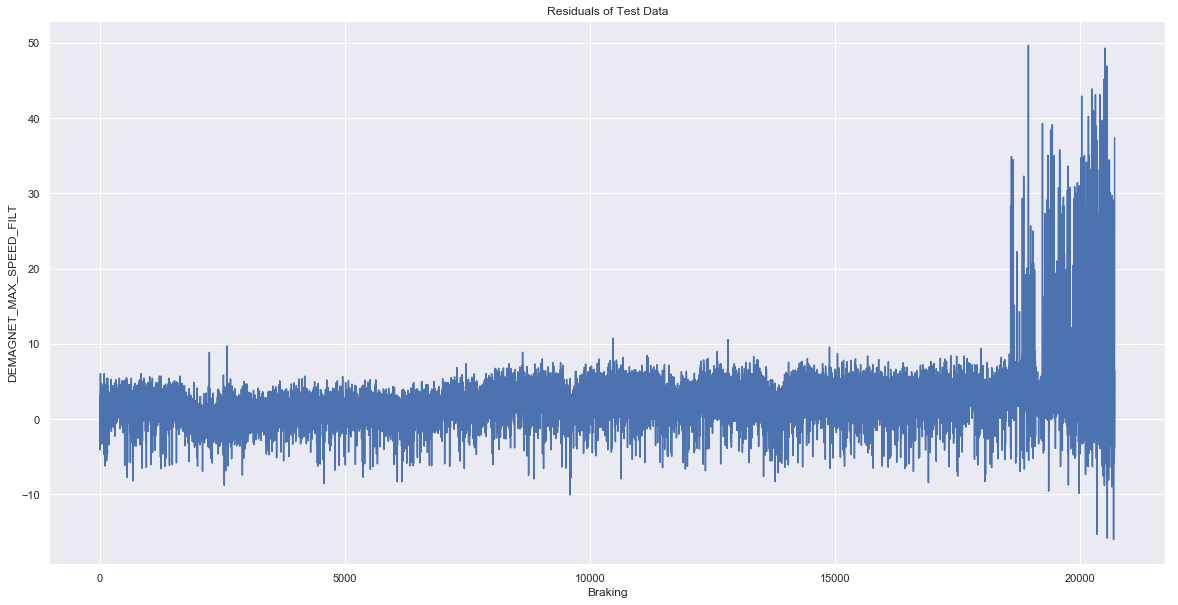

c:\users\rjo7abt\.conda\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


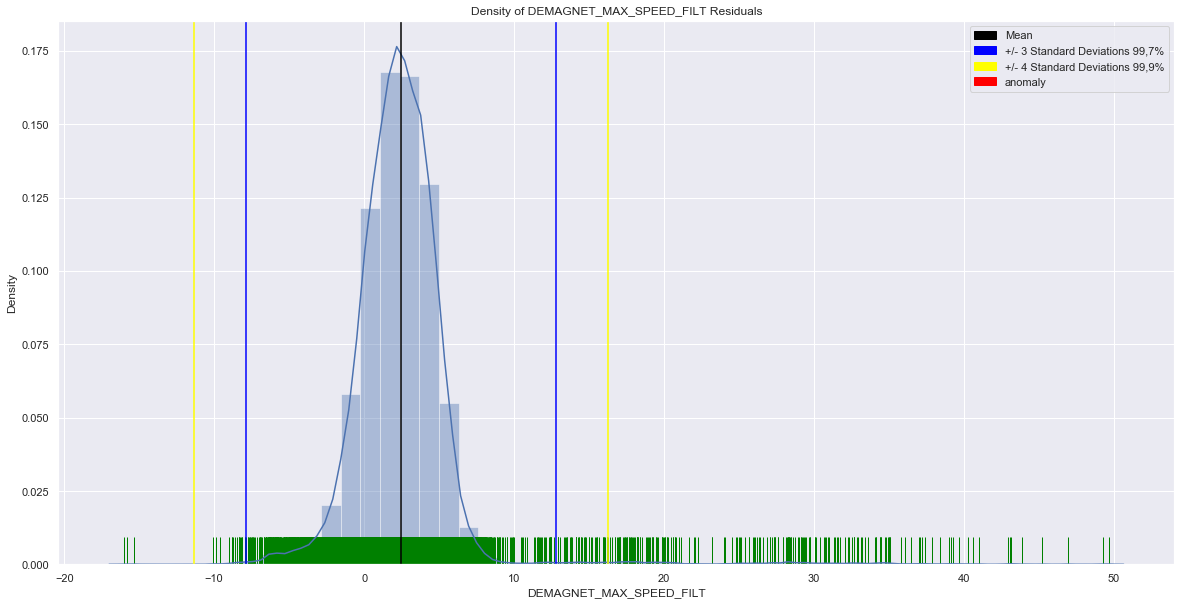

In [144]:
prediction_plot(predictions_mlp, 0, 7500)
residual_plot(residuals_mlp)
residual_distribution_plot(residuals_mlp)

### Vanilla LSTM

In [57]:
n_features = 2
batch_size=1

In [126]:
# define model



#model_vanilla = Sequential()
#model_vanilla.add(LSTM(32, activation='relu', batch_input_shape=(batch_size,None, train_X.shape[2]), stateful=True))
#model_vanilla.add(Dense(1))
#model_vanilla.compile(optimizer='adam', loss='mse')

model_vanilla = Sequential()
model_vanilla.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model_vanilla.add(Dense(1))
model_vanilla.compile(optimizer='adam', loss='mse')

In [127]:
# fit model
start_time = datetime.datetime.now() 
model_vanilla.fit(X_train, y_train, epochs=5, batch_size=1, verbose=2, validation_data=(X_test,y_test), shuffle=True)
#model_vanilla.reset_states()
time_elapsed = datetime.datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Train on 21995 samples, validate on 20703 samples
Epoch 1/5
 - 82s - loss: 3.6072 - val_loss: 10.6610
Epoch 2/5
 - 85s - loss: 3.3523 - val_loss: 12.9422
Epoch 3/5
 - 76s - loss: 3.3315 - val_loss: 10.9258
Epoch 4/5
 - 77s - loss: 3.3311 - val_loss: 10.5971
Epoch 5/5
 - 84s - loss: 3.3117 - val_loss: 12.1281
Time elapsed (hh:mm:ss.ms) 0:06:43.627391


In [128]:
#prediction
predictions_vanilla = model_vanilla.predict(X_test, verbose=1)

20703/20703 [==============================] - 1s 40us/step


In [129]:
residuals_vanilla = y_test - predictions_vanilla.flatten()
mean_squared_error(predictions_vanilla, y_test)


12.128060191676308

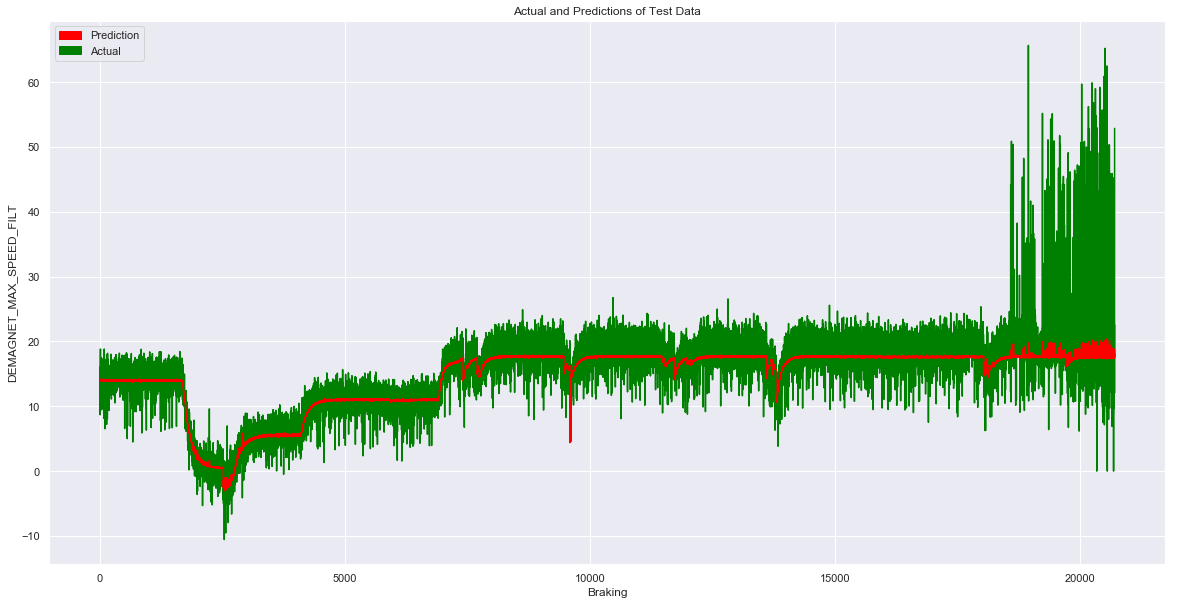

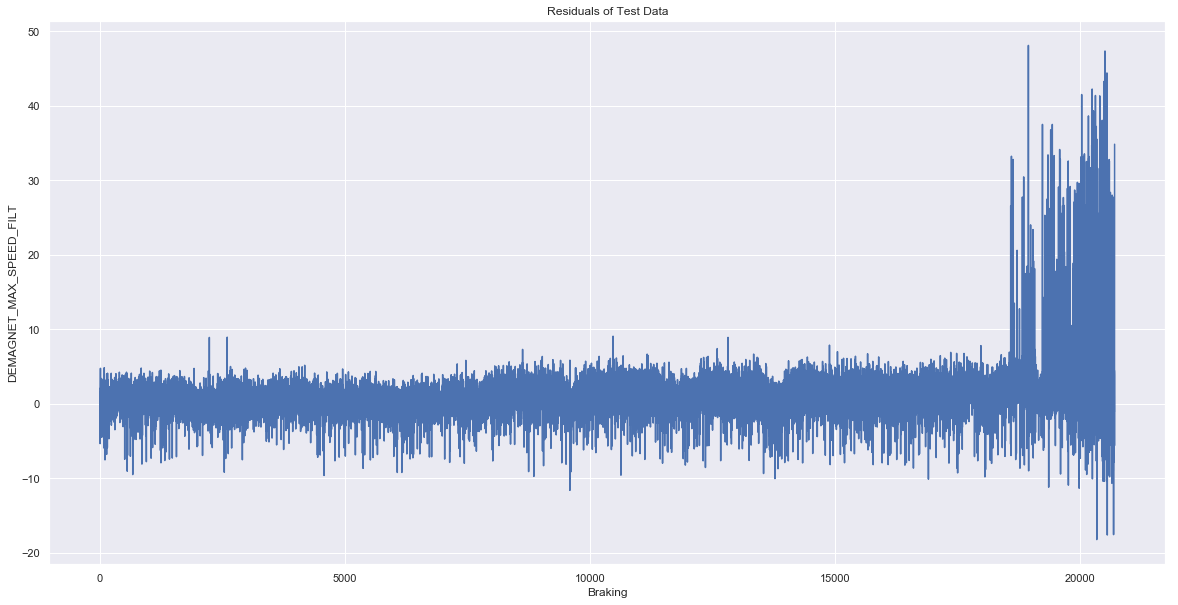

c:\users\rjo7abt\.conda\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


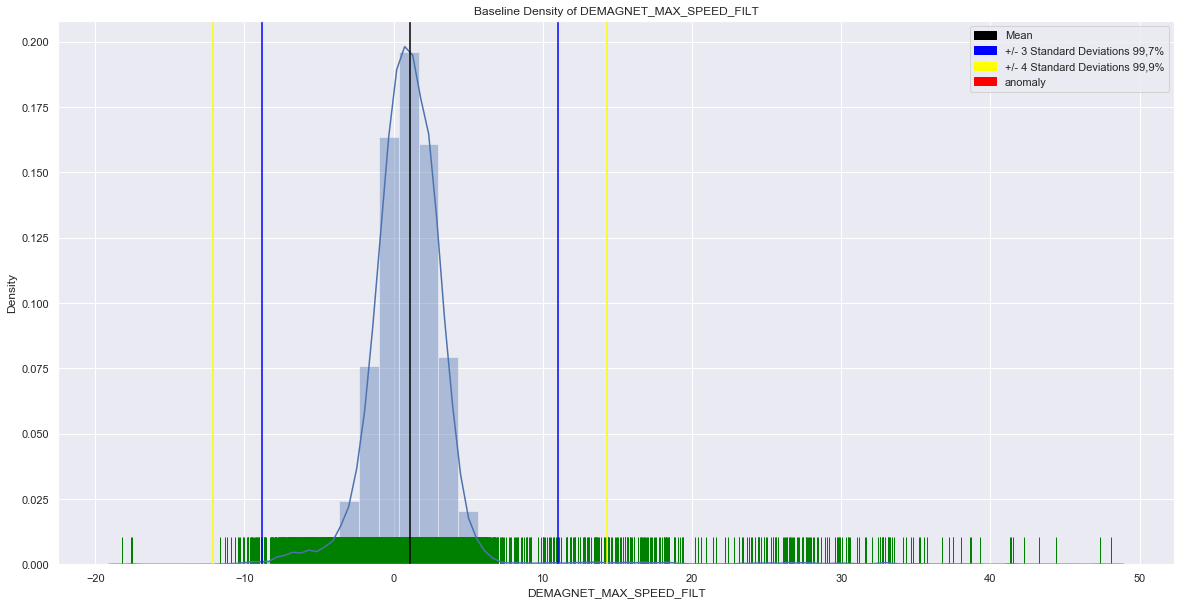

In [130]:
prediction_plot(predictions_vanilla)
residual_plot(residuals_vanilla)
residual_distribution_plot(residuals_vanilla)

### Stacked LSTM

In [199]:
# stacked LSTM
model_stacked = Sequential()
model_stacked.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model_stacked.add(Dropout(0.2))
model_stacked.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model_stacked.add(Dropout(0.2))
model_stacked.add(LSTM(64, activation='relu'))
model_stacked.add(Dropout(0.2))
model_stacked.add(Dense(1))
model_stacked.add(Activation("linear"))
model_stacked.compile(optimizer='adam', loss='mse')

In [200]:
start_time = datetime.datetime.now() 
model_stacked.fit(X_train_scaled, y_train_scaled, epochs=1000, verbose=1, validation_data=(X_test_scaled,y_test_scaled))
time_elapsed = datetime.datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Train on 29996 samples, validate on 12702 samples
Epoch 1/1000
29996/29996 [==============================] - 16s 537us/step - loss: 0.0142 - val_loss: 0.1595
Epoch 2/1000
29996/29996 [==============================] - 13s 438us/step - loss: 0.0057 - val_loss: 0.1846
Epoch 3/1000
29996/29996 [==============================] - 15s 494us/step - loss: 0.0048 - val_loss: 0.2018
Epoch 4/1000
29996/29996 [==============================] - 15s 516us/step - loss: 0.0042 - val_loss: 0.2052
Epoch 5/1000
29996/29996 [==============================] - 14s 483us/step - loss: 0.0038 - val_loss: 0.2103
Epoch 6/1000
29996/29996 [==============================] - 14s 470us/step - loss: 0.0035 - val_loss: 0.2234
Epoch 7/1000
29996/29996 [==============================] - 13s 448us/step - loss: 0.0034 - val_loss: 0.2184
Epoch 8/1000
29996/29996 [==============================] - 14s 452us/step - loss: 0.0034 - val_loss: 0.2171
Epoch 9/1000
29996/29996 [==============================] - 14s 475us/step - l

KeyboardInterrupt: 

SyntaxError: invalid syntax (<ipython-input-65-00f8b77c66ac>, line 2)

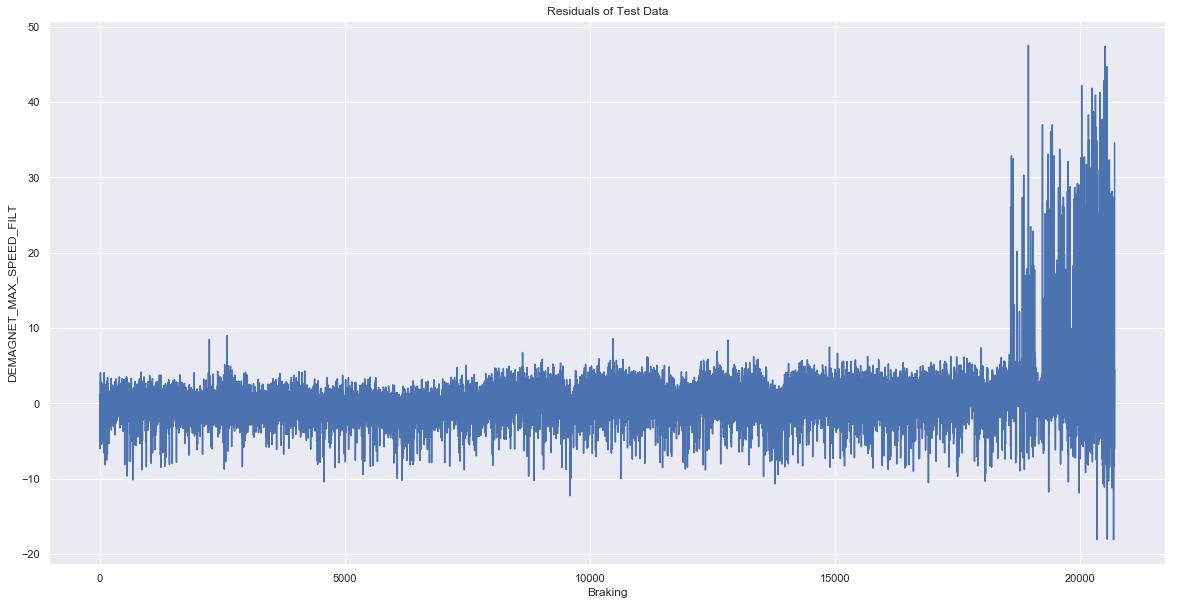

### CNN

### ESD Anomaly Detection

Number of outliers:  220
Indices of outliers:  [18943, 20506, 20546, 20487, 20030, 20244, 20399, 20311, 20270, 20168, 20484, 20449, 19230, 19431, 20328, 19398, 20433, 20534, 20173, 20337, 20235, 20702, 20255, 20029, 19581, 20538, 19343, 19469, 18597, 20086, 20023, 20171, 20067, 18634, 20180, 20595, 20591, 19594, 19756, 20128, 20536, 20210, 20355, 20286, 20532, 20545, 18847, 20485, 20257, 20207, 20458, 20055, 19943, 20445, 20135, 20153, 19976, 19796, 19887, 19558, 20520, 19739, 20652, 20616, 20319, 19907, 20031, 20662, 19657, 20070, 18820, 20694, 19872, 19320, 20296, 20580, 20468, 20701, 20001, 20547, 20275, 20192, 20498, 20291, 19754, 20178, 19641, 20429, 19664, 20102, 18582, 19389, 20046, 20340, 20691, 20396, 20678, 19279, 20231, 20439, 19628, 19432, 20227, 20504, 20515, 19895, 20583, 20382, 18988, 20408, 19871, 20642, 20371, 19037, 20398, 20419, 20262, 20470, 20651, 20191, 20672, 20573, 18713, 20248, 19678, 20505, 20151, 19522, 20681, 20338, 20553, 20298, 19278, 19048, 19859, 18993, 

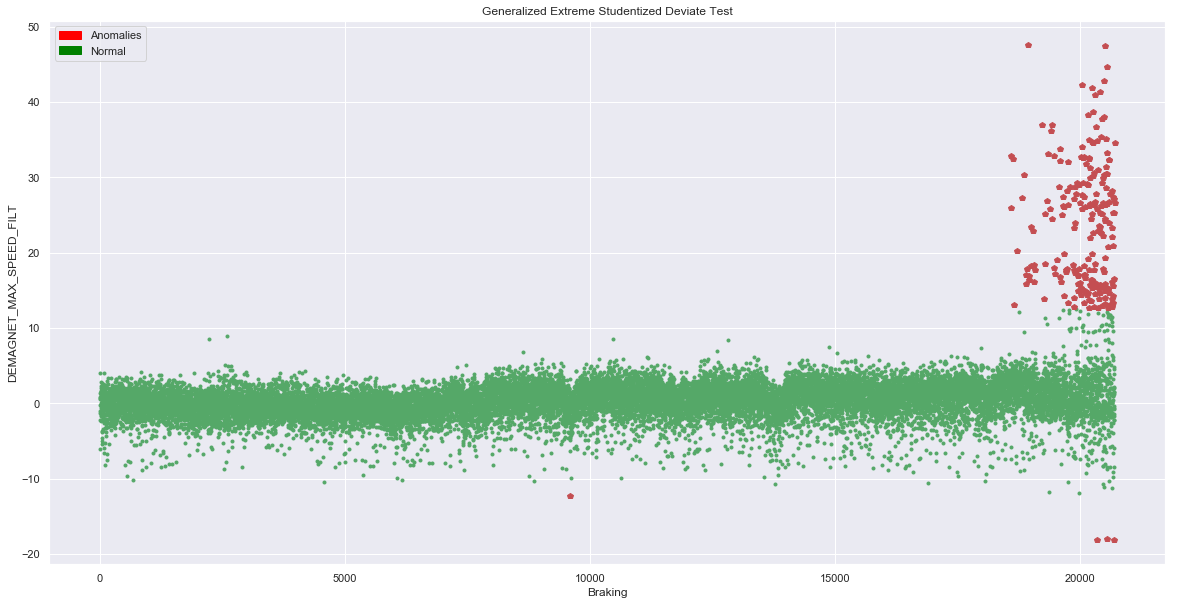

In [75]:
#ESD test for outlier detection
r = pyasl.generalizedESD(residuals_vanilla, 220, 0.05, fullOutput=True)

print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")
for i in range(len(r[2])):
  print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

# Plot the "data"
red_patch = mpatches.Patch(color='red', label='Anomalies')
green_patch = mpatches.Patch(color='green', label='Normal')

plt.subplots(figsize=(20,10))
plt.plot(residuals_vanilla, 'g.')
# and mark the outliers.
for i in range(r[0]):
  plt.plot(r[1][i], residuals_vanilla[r[1][i]], 'rp')

plt.title("Generalized Extreme Studentized Deviate Test")
plt.xlabel("Braking")
plt.ylabel("DEMAGNET_MAX_SPEED_FILT")
plt.legend(handles=[red_patch, green_patch])
plt.show()